In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import holoviews as hv
import numpy as np
from gaussian import *
hv.notebook_extension()
%matplotlib inline

interval = 10
interval_size = 0.01

mpl.rcParams.update({'font.size':14})
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['lines.linewidth'] = 4
plt.rc('text', usetex=True)

### Samples from 1D Gaussian Processes

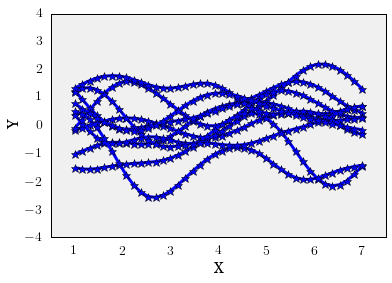

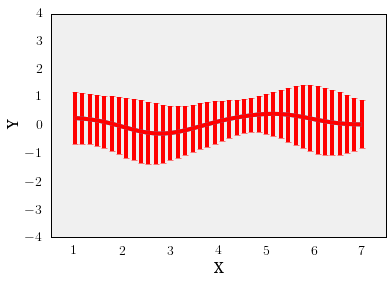

In [2]:
samples = 10
ndim =40
length = 7
sigma_v = 0
l=1
sigma_f=1
uniform=False
mean=0

dots=True
usecolors=False
lw=3
xname="X"
yname="Y"
ylim=4
filename="presentation5"

x,y,cov = genGP(samples=samples, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f, uniform=uniform, dots=dots, lw=lw, xname=xname, yname=yname,ylim=ylim, mean=mean, usecolors=usecolors, filename=filename)

In [3]:
nsample=3
sample_x = np.random.uniform(1,length,nsample)
sample_x.sort()
sample_y = np.cos(sample_x)
data = np.array((sample_x,sample_y))

In [4]:
mu,cov = inference(sample_x, sample_y, x, cov, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f)

### Inference in 1D GP

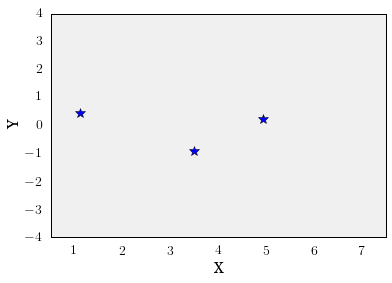

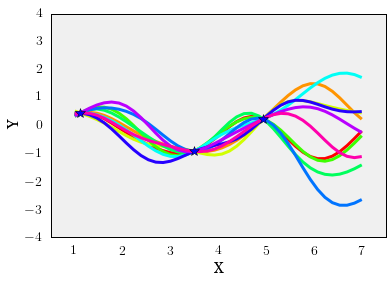

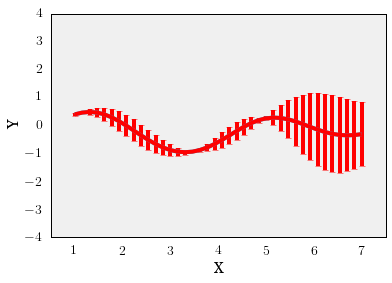

In [5]:
y=np.random.multivariate_normal(mu, cov, samples).T
plotGP(x,y,xlim=length,ylim=ylim,data=data,filename="presentation")


### Samples from 2D Gaussian Processes

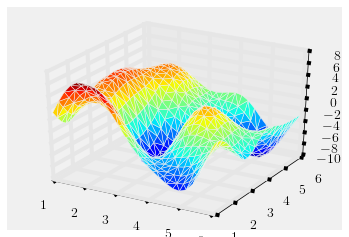

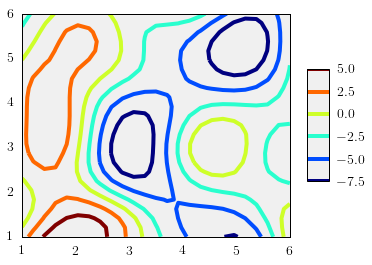

In [6]:
from matplotlib import cm

samples=1
ndim=25
cov,x,y = sigma2(ndim,uniform=False)
mu=np.zeros(ndim*ndim)
z=np.random.multivariate_normal(mu, cov, samples).T
z = z.reshape(ndim,ndim).T
x = x.reshape(ndim,ndim).T
y = y.reshape(ndim,ndim).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x.flatten(),y.flatten(),z.flatten(), cmap=cm.jet)
fig.show()

fig = plt.figure()
surf = plt.contour(x,y,z,cmap=cm.jet)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
cov,x,y = sigma2(ndim,uniform=False)

In [8]:
nsample=3
sample_x = np.array([1.0,3.0])
sample_y = np.array([2.0,4.0])
sample_z = np.array([-20.0,22.0])

### We get two readings, as the two points seen below

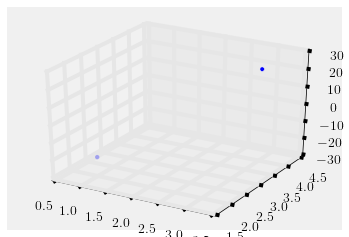

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample_x, sample_y, sample_z)
fig.show()

In [10]:
mu,cov = inference2D(sample_x, sample_y, sample_z, x, y, cov, ndim=25, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f)

### We can generate a smooth plane going through those two points (the peak and the dip)


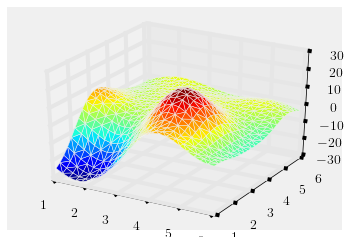

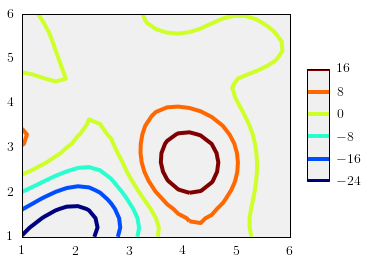

In [40]:
z=np.random.multivariate_normal(mu, cov, samples).T
z = z.reshape(ndim,ndim).T
x = x.reshape(ndim,ndim).T
y = y.reshape(ndim,ndim).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x.flatten(),y.flatten(),z.flatten(), cmap=cm.jet)
fig.show()

fig = plt.figure()
surf = plt.contour(x,y,z,cmap=cm.jet)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Another plane going through the same two points

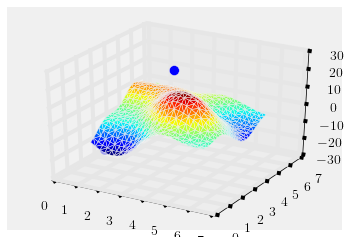

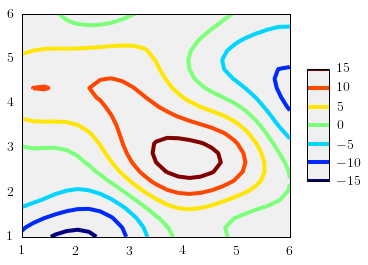

In [41]:
z=np.random.multivariate_normal(mu, cov, samples).T
z = z.reshape(ndim,ndim).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x.flatten(),y.flatten(),z.flatten(), cmap=cm.jet)
ax.scatter(sample_x, sample_y, sample_z,s=100)
fig.show()

fig = plt.figure()
surf = plt.contour(x,y,z,cmap=cm.jet)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()